# 可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [3]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


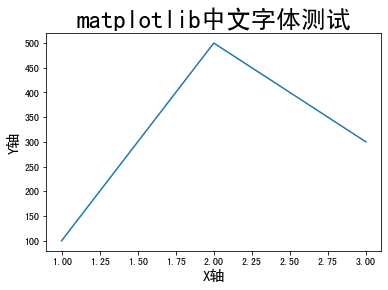

In [4]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [5]:
import os
os.chdir('../../mmsegmentation')

In [6]:
os.getcwd()

'/home/cine/Documents/GitHub/mmsegmentation'

## 导入工具包

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [8]:
# 日志文件路径
log_path = 'work_dirs/DubaiDataset/20230614_222855/vis_data/scalars.json'

In [9]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [10]:
len(json_list)

37

In [11]:
eval(json_list[4])

{'aAcc': 56.51,
 'mIoU': 13.8,
 'mAcc': 21.46,
 'data_time': 0.003896498680114746,
 'time': 0.5213921546936036,
 'step': 400}

In [13]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

In [14]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,memory,step
0,0.009978,0.004418,0.105867,0.073984,78.881836,0.031882,69.833374,0.310437,5948.0,100.0
1,0.009956,0.004372,0.098512,0.070201,54.464722,0.028311,56.732178,0.313566,3774.0,200.0
2,0.009933,0.004429,0.093133,0.065997,45.471191,0.027136,43.469238,0.315761,3774.0,300.0
3,0.009911,0.004246,0.078221,0.054541,69.790649,0.023679,70.071411,0.318363,3774.0,400.0
4,0.009889,0.004132,0.084531,0.059237,70.959473,0.025295,70.016479,0.318632,4997.0,500.0
5,0.009866,0.004024,0.079556,0.056479,51.141357,0.023077,46.298218,0.318304,3774.0,600.0
6,0.009844,0.004250,0.082847,0.058521,60.113525,0.024326,60.610962,0.318592,3774.0,700.0
7,0.009822,0.004370,0.075388,0.053381,56.204224,0.022007,54.849243,0.323067,3774.0,800.0
8,0.009800,0.004749,0.075440,0.053989,70.599365,0.021451,66.595459,0.323064,3774.0,900.0
9,0.009777,0.004789,0.071390,0.050480,78.948975,0.020910,73.965454,0.319250,3774.0,1000.0


In [15]:
df_test

,aAcc,mIoU,mAcc,data_time,time,step
0,56.51,13.80,21.46,0.003896,0.521392,400.0
1,59.44,19.45,27.03,0.003782,0.268564,800.0
2,59.08,18.37,26.21,0.003787,0.268767,1200.0
3,57.93,16.22,23.73,0.003523,0.271064,1600.0
4,62.00,23.48,32.16,0.003899,0.268842,2000.0
5,64.62,27.74,36.00,0.003536,0.268659,2400.0
6,67.26,32.57,44.64,0.003666,0.275031,2800.0


## 导出训练日志表格

In [16]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [17]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [18]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

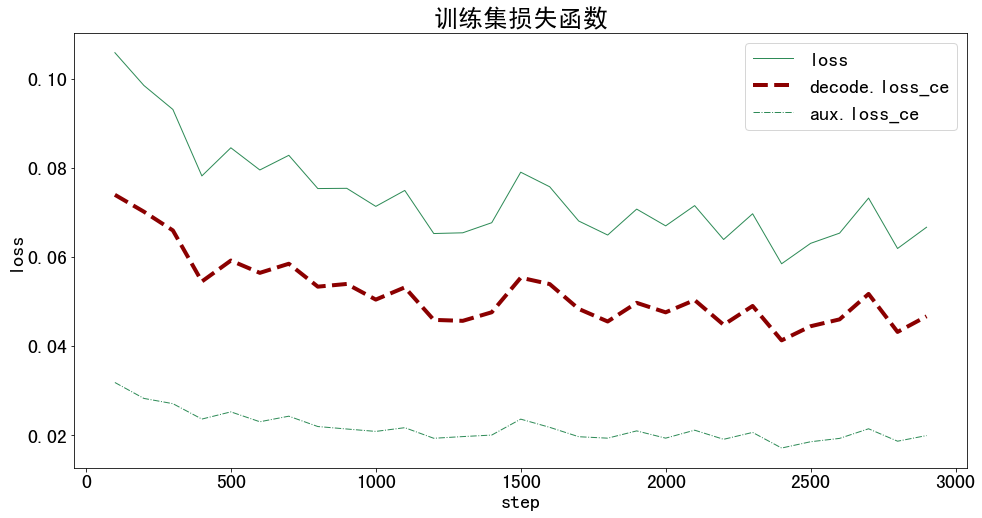

In [19]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [20]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'decode.loss_ce', 'decode.acc_seg',
       'aux.loss_ce', 'aux.acc_seg', 'time', 'memory', 'step'],
      dtype='object')

In [21]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

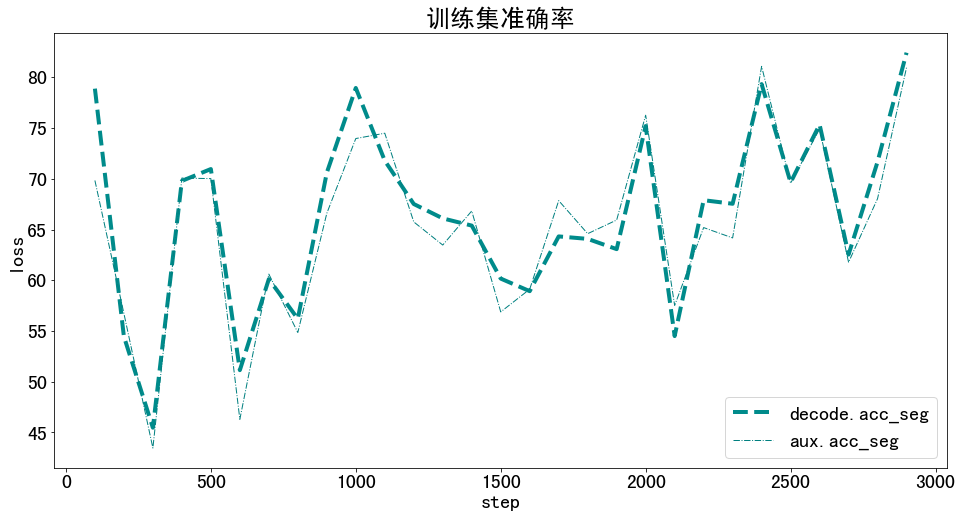

In [22]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标

In [23]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'data_time', 'time', 'step'], dtype='object')

In [24]:
metrics = ['aAcc', 'mIoU', 'mAcc']

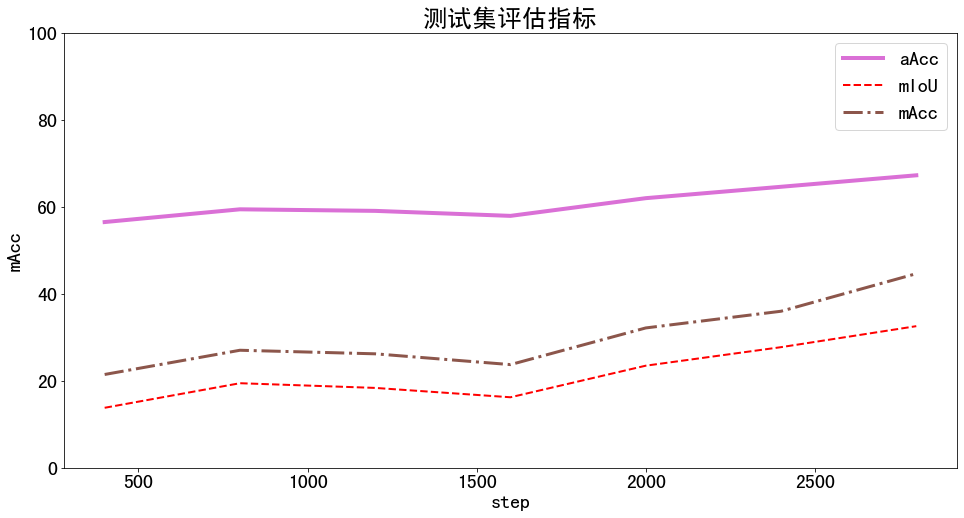

In [25]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()